# Yu-Gutnisky-2016 - A DataJoint example
This notebook presents data and results associated with the following papers:

>Jianing Yu, Diego A Gutnisky, S Andrew Hires & Karel Svoboda1. "Layer 4 fast-spiking interneurons filter thalamocortical signals during active somatosensation" (2016) Nat Neurosci (https://dx.doi.org/10.1038/nn.4412)

In this study, membrane potential and spikes recordings were performed ventral posteromedial nucleus (VPM) neurons and layer 4 (L4) neurons of the barrel cortex, during an object-locating with whiskers task. The study reported a movement-related suppression mechanism of the thalamocortical circuit. Specifically, the L4 fast-spiking interneurons, inherited from the sensory input driven VPM activity, suppressed movement-related activity of the L4 excitatory neurons. This movement-related suppression thus improved selectivity for touch-related information during active tactile sensation.

A ***DataJoint*** data pipeline has been constructed for this study, with the presented data ingested into this pipeline. This notebook demonstrates the queries, processing, and reproduction of several figures from the paper. From the pipeline, export capability to NWB 2.0 format is also available.

## About the data

The dataset comprises of membrane potential, extracellular recordings and spike sorted results of the mouse's VPM and L4 neurons a whisker-based object locating task. The behavior data includes detailed description of the trial structure (e.g. trial timing, trial instruction, trial response, etc.), lick trace data and a variety of whisker movement related tracking data: whisker angle, whisker curavture, touch times, etc. Trial information also includes optogenetic photostimulation details.

Original data shared here: http://crcns.org/data-sets/ssc/ssc-7

The data in original NWB 1 format (.nwb) have been ingested into a DataJoint data pipeline presented below. This notebook demonstrates the queries, processing, and reproduction of several figures from the paper.

Data are also exported into NWB 2.0 format. See NWB export code [here](../scripts/datajoint_to_nwb.py)

In [1]:
from datetime import datetime
import os
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import datajoint as dj
from pipeline import (reference, subject, acquisition, stimulation, analysis, virus,
                      intracellular, extracellular, behavior, utilities)

Connecting root@127.0.0.1:3306


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

## Architecture of the data pipeline

This data pipeline is comprised of three core components:
+ *subject*: the meta information on the animal, e.g. genetic information, virus injection
+ *acquisition*: the organization of the experiment: session acquisition, trial structure, behavior data
+ *electrophysiology* data: intracellular and extracellular recordings, as well as spike sorted results

### Subject

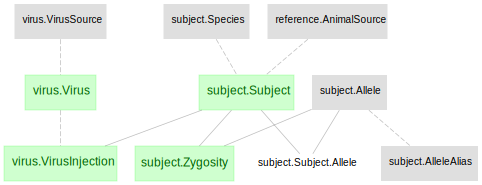

In [10]:
dj.Diagram(subject) - 1 + dj.Diagram(virus)

In [19]:
subject.Subject()

*subject_id    species        animal_source  sex     date_of_birth  subject_descri
+------------+ +------------+ +------------+ +-----+ +------------+ +------------+
anm184389      Mus musculus   Jackson        M       None           None          
anm186997      Mus musculus   Jackson        M       None           None          
anm190963      Mus musculus   GENSAT         F       2012-10-14     None          
anm190964      Mus musculus   GENSAT         F       2012-10-14     None          
anm196837      Mus musculus   GENSAT         F       2012-12-05     None          
anm199549      Mus musculus   Jackson        M       None           None          
anm199551      Mus musculus   Jackson        F       None           None          
   ...
 (Total: 55)

### Experiment acquisition

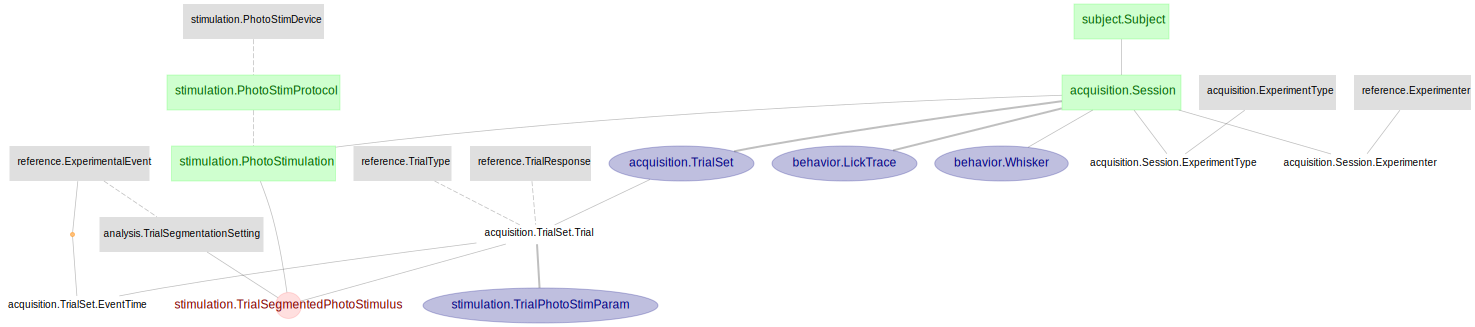

In [9]:
dj.Diagram(acquisition) - 1 + dj.Diagram(stimulation) + dj.Diagram(behavior)

Display the sessions

In [12]:
acquisition.Session.proj() * subject.Subject

*subject_id    *session_time  *session_id    species        animal_source  sex     date_of_birth  subject_descri
+------------+ +------------+ +------------+ +------------+ +------------+ +-----+ +------------+ +------------+
anm184389      2013-02-07 00: ANM184389_2013 Mus musculus   Jackson        M       None           None          
anm184389      2013-02-11 00: ANM184389_2013 Mus musculus   Jackson        M       None           None          
anm184389      2013-02-12 00: ANM184389_2013 Mus musculus   Jackson        M       None           None          
anm184389      2013-02-13 00: ANM184389_2013 Mus musculus   Jackson        M       None           None          
anm186997      2013-03-17 00: ANM186997_2013 Mus musculus   Jackson        M       None           None          
anm186997      2013-03-21 00: ANM186997_2013 Mus musculus   Jackson        M       None           None          
anm190963      2013-04-08 00: JY0520AAAC     Mus musculus   GENSAT         F       2012-10-14     None          
   ...
 (Total: 148)

Display the trials

In [14]:
acquisition.TrialSet.Trial()

*subject_id    *session_time  *session_id    *trial_id    start_time     stop_time     trial_type     trial_response trial_stim_pre pole_position 
+------------+ +------------+ +------------+ +----------+ +------------+ +-----------+ +------------+ +------------+ +------------+ +------------+
anm184389      2013-02-07 00: ANM184389_2013 1            0.0            5.0           Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 2            5.0            10.0          Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 3            10.0           15.0          Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 4            15.0           20.0          Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 5            20.0           25.0          Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 6            25.0           30.0          Go             Miss           0              nan           
anm184389      2013-02-07 00: ANM184389_2013 7            30.0           35.0          Go             Miss           0              nan           
   ...
 (Total: 18867)

### Electrophysiology

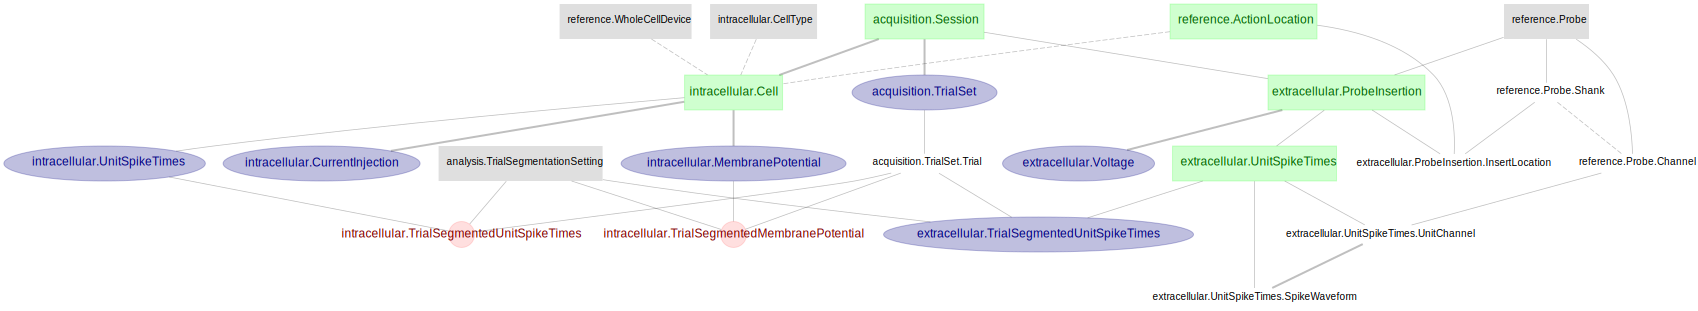

In [7]:
(dj.Diagram(extracellular) - 1) + (dj.Diagram(intracellular) - 1)

The Unit table

In [17]:
extracellular.UnitSpikeTimes * extracellular.ProbeInsertion.InsertLocation 

*subject_id    *session_time  *session_id    *probe_name    *channel_count *unit_id    *shank_id    *brain_region  *brain_subregi *cortical_laye *hemisphere    *coordinate_re *coordinate_ap *coordinate_ml *coordinate_dv spike_time cell_desc     
+------------+ +------------+ +------------+ +------------+ +------------+ +---------+ +----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +--------+ +------------+
anm184389      2013-02-07 00: ANM184389_2013 4x8_Neuronexus 32             1           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-07 00: ANM184389_2013 4x8_Neuronexus 32             2           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-07 00: ANM184389_2013 4x8_Neuronexus 32             3           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-11 00: ANM184389_2013 4x8_Neuronexus 32             1           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-11 00: ANM184389_2013 4x8_Neuronexus 32             2           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-12 00: ANM184389_2013 4x8_Neuronexus 32             1           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
anm184389      2013-02-12 00: ANM184389_2013 4x8_Neuronexus 32             2           0            thalamus       VPM            N/A            left           bregma         0.00           0.00           2.50           =BLOB=     thalamic. Unit
   ...
 (Total: 116)

## Reproduce key figures

To demonstrate the availability and usage of the data in the pipeline, the following sections of this notebook will show the extraction and plotting of several sets of tracking and ephys data of interest, specifically, we will reproduce ***Figure 1*** and ***Figure 2*** of this study.

Figure 1 and 2 depict the behavior and electrophysiology data of VPM and L4 excitatory neurons over the course of an experimental trial, as well as trial-averaged membrane potential and spike rate. To reproduce these figures, the following steps are taken:
1. extract ephys and behavioral data:
    + membrane potential
    + spikes
    + whisker movement
    + touch trace
2. plot these data, per trial, time-locked to trial-start
3. extract touch times
4. perform trial segmentation and realignment of ephys data to touch times
5. plot spike raster, trial-averaged membrane potential and spike histogram

To accomplish those steps, we define 3 utility functions to help with extracting and segmenting data:
+ ***segment_timeseries*** - segment any timeseries (e.g. Vm, lick traces) or event-series (e.g. spike times) to some specified time (e.g. trial start time or first touch time)
+ ***build_raster_and_PSTH*** - from spike times, compute PSTH
+ ***build_trial_segmented_timeseries*** - the main processing routine, to extract Vm, behavioral data, spikes, etc. and segment, aligned to i) trial-start and ii) touch onset

and 2 plotting functions:
+ ***plot_trial_start_align*** - plot behavioral and ephys daata from a single trial, aligned to trial-start time
+ ***plot_touch_aligned*** - plot trial aggregated behavioral, ephys, and spike PSTH, aligned to first touch onset

In [4]:
def segment_timeseries(data, timestamps, event_times, pre_dur, post_dur):
    d_seg = [data[np.logical_and(timestamps > t - pre_dur, timestamps <= t + post_dur)] for t in event_times]
    t_seg = [timestamps[np.logical_and(timestamps > t - pre_dur, timestamps <= t + post_dur)] - t for t in event_times]
    return d_seg, t_seg

In [5]:
# trial-average spike histogram
def build_raster_and_PSTH(spike_times, timerange, bin_size=0.05):
    stacked_spikes = np.hstack(spike_times)
    stacked_trials = np.hstack([np.full_like(r, idx) if r.size > 0 else [] for idx, r in enumerate(spike_times)])
    spk_counts, spk_edges = np.histogram(stacked_spikes, bins=int((timerange[-1] - timerange[0]) / bin_size), range=timerange)
    spk_rates = spk_counts / np.diff(spk_edges) / len(spike_times)
    return stacked_spikes, stacked_trials, spk_rates, spk_edges[:-1]

In [6]:
def build_trial_segmented_timeseries(session_key):
    trial_start, trial_stop = (acquisition.TrialSet.Trial & session_key).fetch('start_time', 'stop_time')
    
    # get behavioral data from the principal whisker
    dis_to_pole, touch_on, touch_off, whisk_pos, whisk_curv, b_tvec = (behavior.Whisker 
                                                                       & session_key
                                                                       & 'principal_whisker=1').fetch1(
        'distance_to_pole', 'touch_onset', 'touch_offset', 'whisker_angle', 'whisker_curvature', 'behavior_timestamps')
    
    touch_on = np.where(touch_on==1, touch_on, np.nan)
    touch_off = np.where(touch_off==1, touch_off, np.nan)
    
    if extracellular.UnitSpikeTimes & session_key:
        spike_times = (extracellular.UnitSpikeTimes & session_key).fetch1('spike_times')
    elif intracellular.UnitSpikeTimes & session_key:
        spike_times = (intracellular.UnitSpikeTimes & session_key).fetch1('spike_times')
    
    lick_traces, l_tvec = (behavior.LickTrace & session_key).fetch1('lick_trace', 'lick_trace_timestamps')
    
    # ---- align to trial start ----
    # segment: 0 to 5s of trial_start
    event_times = trial_start
    pre_dur = 0
    post_dur = 5
    b_fs = round(1/np.median(np.diff(b_tvec)))
    
    segmented_spikes = [spike_times[np.logical_and(spike_times > t - pre_dur, 
                                               spike_times <= t + post_dur)] - t for t in event_times]
    segmented_lick_traces, segmented_ltvec = segment_timeseries(lick_traces, l_tvec, event_times, pre_dur, post_dur)
    segmented_behav = {k: segment_timeseries(d, b_tvec, event_times, pre_dur, post_dur)[0]
                   for k, d in zip(('touch_on', 'touch_off', 'whisk_pos', 'whisk_curv'), 
                                   (touch_on, touch_off, whisk_pos, whisk_curv))}
    segmented_btvec = segment_timeseries(whisk_pos, b_tvec, event_times, pre_dur, post_dur)[1]
    
    trial_start_aligned = {'pre_start': pre_dur, 'post_start':post_dur, 'spikes': segmented_spikes,
                           'licks': segmented_lick_traces, 'lick_times': segmented_ltvec,
                           'whiskers': segmented_behav, 'whisker_times': segmented_btvec}
    
    if intracellular.MembranePotential & session_key:
        Vm, v_tvec = (intracellular.MembranePotential & cell_key).fetch1('membrane_potential', 'membrane_potential_timestamps')
        segmented_Vm, segmented_vtvec = segment_timeseries(Vm, v_tvec, event_times, pre_dur, post_dur)
        trial_start_aligned.update(Vm=segmented_Vm, Vm_times=segmented_vtvec)
    
    # ---- align to touch onsets ----
    # touch times
    touch_onset = b_tvec[touch_on==1]
    touch_offset = b_tvec[touch_off==1]
    # inter-touch-interval - of each touch
    iti = (touch_onset[1:] - touch_offset[:-1]) 
    
    # get touch-onset that has inter-touch-interval of at least 25ms
    touch_onset = touch_onset[:-1][iti > 25e-3]
    # segment: -25ms to 50ms of touch-time
    pre_touch = 25e-3
    post_touch = 50e-3
    # touch-aligned spike-times
    touch_aligned_spikes = [spike_times[np.logical_and(spike_times > t_touch - pre_touch, 
                                                       spike_times < t_touch + post_touch)] - t_touch
                            for t_touch in touch_onset]
    # touch-aligned Whisker Curvature
    touch_aligned_curvature, touch_aligned_btvec = segment_timeseries(whisk_curv, b_tvec, touch_onset, pre_touch, post_touch)
    touch_aligned_curvature = [np.where((k - k[:100].mean()) < 0, k - k.mean(), 0) for k in touch_aligned_curvature]
    
    # psth
    stacked_spikes, stacked_trials, spk_rates, spk_edges = build_raster_and_PSTH(
        touch_aligned_spikes, (-pre_touch, post_touch), bin_size=0.001)
    
    touch_aligned = {'pre_touch': pre_touch, 'post_touch':post_touch, 'spikes': touch_aligned_spikes,
                     'whisk_curv': touch_aligned_curvature, 'whisker_times': touch_aligned_btvec,
                     'stacked_spikes': stacked_spikes, 'stacked_trials': stacked_trials,
                     'spk_rates': spk_rates, 'spk_edges': spk_edges}
    
    if intracellular.MembranePotential & session_key:
        # touch-aligned Vm
        touch_aligned_Vm, touch_aligned_vtvec = segment_timeseries(Vm, v_tvec, touch_onset, pre_touch, post_touch)
        touch_aligned.update(Vm=touch_aligned_Vm, Vm_times=touch_aligned_vtvec)
    
    return trial_start_aligned, touch_aligned

In [7]:
def plot_trial_start_aligned(trial_num, trial_start_aligned):
    pre_dur = trial_start_aligned['pre_start']
    post_dur = trial_start_aligned['post_start']
    l_tvec = trial_start_aligned['lick_times'][trial_num]
    licks = trial_start_aligned['licks'][trial_num]
    b_tvec = trial_start_aligned['whisker_times'][trial_num]
    whisk_curv = trial_start_aligned['whiskers']['whisk_curv'][trial_num]
    touch_on = trial_start_aligned['whiskers']['touch_on'][trial_num]
    whisk_pos = trial_start_aligned['whiskers']['whisk_pos'][trial_num]
    spikes = trial_start_aligned['spikes'][trial_num]
    
    
    if 'Vm' in trial_start_aligned:
        fig, axs = plt.subplots(5, 1, figsize=(12, 6))
        fig.subplots_adjust(hspace=0.01)
        
        for x in b_tvec[touch_on==1]:
            axs[3].axvline(x, 0.25, 0.75, color='deepskyblue')
        axs[3].plot(trial_start_aligned['Vm_times'][trial_num], trial_start_aligned['Vm'][trial_num], 'k')
        axs[4].plot(b_tvec, whisk_pos, 'g')
        axs[4].plot(b_tvec, whisk_pos * touch_on, '.', c='deepskyblue')
            
    else:
        fig, axs = plt.subplots(4, 1, figsize=(12, 6))
        fig.subplots_adjust(hspace=0.01)
        
        for x in b_tvec[touch_on==1]:
            axs[2].axvline(x, 0.25, 0.75, color='deepskyblue')
        axs[3].plot(b_tvec, whisk_pos, 'g')
        axs[3].plot(b_tvec, whisk_pos * touch_on, '.', c='deepskyblue')

    axs[0].plot(l_tvec, np.where(licks > 0, licks, np.nan), '.', color='deeppink')
    axs[1].plot(b_tvec, whisk_curv, 'deepskyblue')
    for x in spikes:
        axs[2].axvline(x, 0.35, 0.65, color='k')
    
    for a in axs:
        a.set_xlim((-pre_dur, post_dur))
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.set_yticks([])
        a.set_xlim((0.5, 2))
    for a in axs[:-1]:
        a.set_xticks([])

In [8]:
def plot_touch_aligned(touch_aligned):
    pre_dur = touch_aligned['pre_touch']
    post_dur = touch_aligned['post_touch']
    b_tvec = touch_aligned['whisker_times']
    whisk_curv = touch_aligned['whisk_curv']
    stacked_spikes = touch_aligned['stacked_spikes']
    stacked_trials = touch_aligned['stacked_trials']
    spk_rates = touch_aligned['spk_rates']
    spk_edges = touch_aligned['spk_edges']
    
    if 'Vm' in trial_start_aligned:
        fig, axs = plt.subplots(4, 1, figsize=(4, 8))
        rand_trials = np.random.randint(len(touch_aligned['Vm']), size=20)
        for k in rand_trials:
            axs[2].plot(touch_aligned['Vm_times'][k], touch_aligned['Vm'][k], color='gray', alpha=0.2)
        axs[3].bar(spk_edges, spk_rates, width=0.001, color='k')
    else:
        fig, axs = plt.subplots(3, 1, figsize=(4, 6))

        axs[2].bar(spk_edges, spk_rates, width=0.001, color='k')
        
    rand_trials = np.random.randint(len(whisk_curv), size=20)
    for k in rand_trials:
        axs[0].plot(b_tvec[k], whisk_curv[k], color='b', alpha=0.5)
    rand_trials = np.random.randint(len(stacked_spikes), size=40)
    axs[1].plot(stacked_spikes[rand_trials], stacked_trials[rand_trials], '|', color='k')
        
    # cosmetic
    for a in axs[:-1]:
        a.set_axis_off()
        a.set_xlabel([])
        a.set_xlim((-pre_dur, post_dur))

    for a in axs[1:]:
        a.axvline(x=0, color='b')
        a.set_xlim((-pre_dur, post_dur))

    axs[-1].set_xlabel('Time from touch onset')
    axs[-1].spines["top"].set_visible(False)
    axs[-1].spines["right"].set_visible(False)

## Replication of Figure 1 (b, d) - VPM

Plot the trial-aligned behavior and ephys data from one representative trial

Plot ephys, spike PSTH for 3 cells:
+ ANM199549_20130530
+ ANM199552_20130602
+ ANM186997_20130321

One session represents the recording of one neuron, thus the `session_id` also depicts the cell

In [20]:
session_key = acquisition.Session & 'session_id = "ANM199549_20130530"'

In [27]:
extracellular.UnitSpikeTimes * extracellular.ProbeInsertion & session_key

*subject_id    *session_time  *session_id    *probe_name    *channel_count *unit_id    spike_time cell_desc     
+------------+ +------------+ +------------+ +------------+ +------------+ +---------+ +--------+ +------------+
anm199549      2013-05-30 00: ANM199549_2013 4x8_Neuronexus 32             1           =BLOB=     thalamic. Unit
 (Total: 1)

From the selected `session_key` extract the behavioral and ephys data of interest, calling the `build_trial_segmented_timeseries()` function defined above

In [12]:
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(session_key)

#### Plot behavioral and ephys data for one representative trial (trial 348)
Invoke the `plot_trial_start_aligned()` defined above

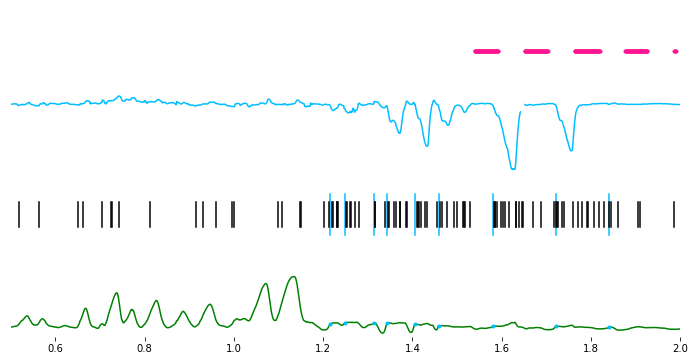

In [13]:
plot_trial_start_aligned(348, trial_start_aligned)

#### Plot touch-aligned spike raster and spike histogram

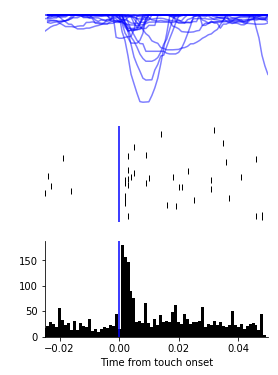

In [29]:
plot_touch_aligned(touch_aligned)

#### Repeat the plots for other neurons

In [30]:
session_key = acquisition.Session & 'session_id = "ANM199552_20130602"'
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(session_key)

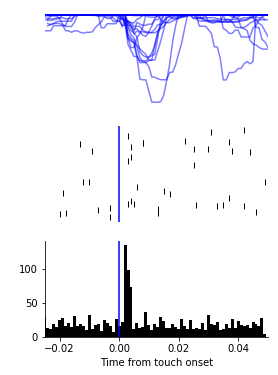

In [35]:
plot_touch_aligned(touch_aligned)

In [36]:
session_key = acquisition.Session & 'session_id = "ANM186997_20130321"'
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(session_key)

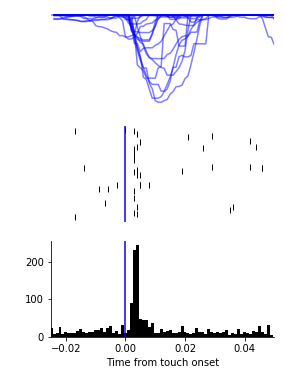

In [42]:
plot_touch_aligned(touch_aligned)

## Replication of Figure 2 (b, d) - L4 excitatory cell

The actual implementation here is almost identical to that of Figure 1 above, which revolves around selecting one `cell` key, and invoking the utility functions defined above.

Plot the trial-aligned behavior and ephys data from one representative trial

Plot ephys, spike PSTH for 3 cells:
+ JY0861AAAA
+ JY0520AAAC
+ JY1008AAAA

Snippet of the pipeline architecture around intracellular data

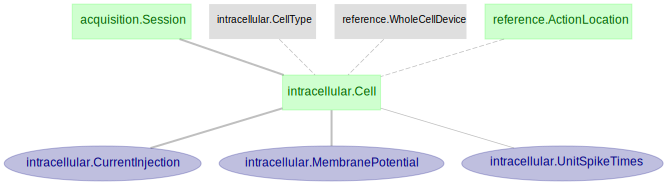

In [30]:
dj.Diagram(intracellular.Cell) + 1 - 1

In [43]:
cell_key = intracellular.Cell & {'session_id': 'JY0861AAAA'}
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(cell_key)

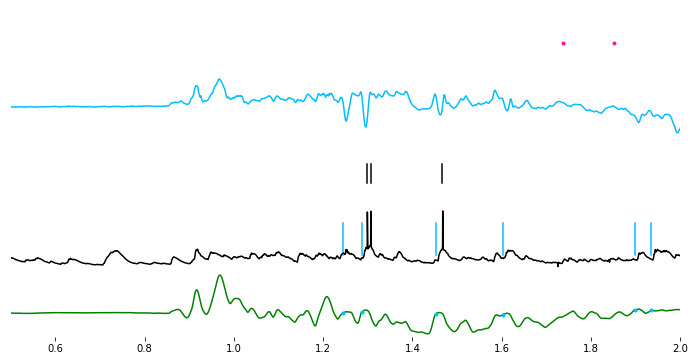

In [44]:
plot_trial_start_aligned(20, trial_start_aligned)

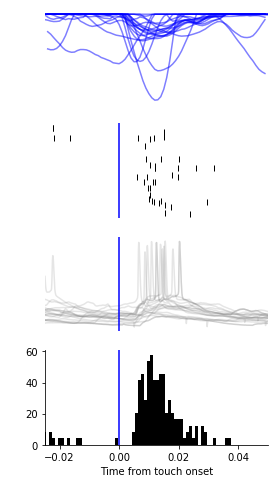

In [48]:
plot_touch_aligned(touch_aligned)

In [50]:
cell_key = intracellular.Cell & {'session_id': 'JY0520AAAC'}
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(cell_key)

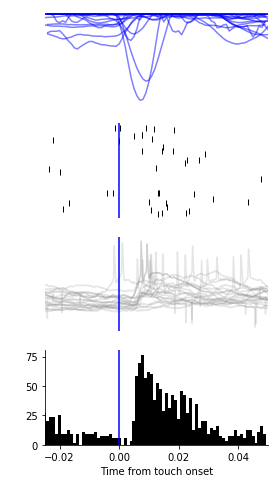

In [78]:
plot_touch_aligned(touch_aligned)

In [79]:
cell_key = intracellular.Cell & {'session_id': 'JY1008AAAA'}
trial_start_aligned, touch_aligned = build_trial_segmented_timeseries(cell_key)

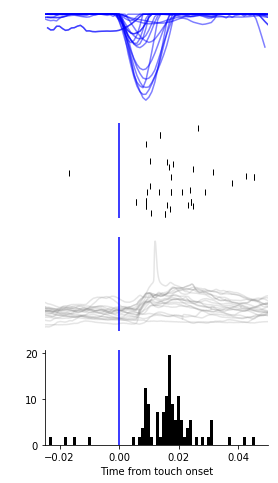

In [82]:
plot_touch_aligned(touch_aligned)